## CS-471: Machine Learning
### **Submitted By**:
#### **Name**: Ayesh Ahmad
#### **CMS**: 365966
#### **Class**: BESE-12A
---
## Lab 4

#### **1.** Setup

##### **a.** Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

##### **b.** Loading the auto-mpg data

In [2]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
columns = list(df.columns)
columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

---
#### **2.** Data preprocessing

##### **a.** Data shape

In [4]:
df.shape

(398, 9)

##### **b.** Finding missing values and filling/removing them

In [5]:
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)

Missing values:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


##### **c.** Removing unncessary columns

In [6]:
df.drop(['model year'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


##### **d.** Ensuring correct datatypes

`horsepower` should be `int64` dtype, altering this:

In [7]:
# Replace non-numeric values with NaN, calculate the mean, and replace NaN values with the mean

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
mean_horsepower = df['horsepower'].mean()
df['horsepower'].fillna(mean_horsepower, inplace=True)
df['horsepower'] = df['horsepower'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


C:\Users\ayesh\AppData\Local\Temp\ipykernel_9876\1105319236.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(mean_horsepower, inplace=True)


In [8]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)

print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['car name']
numerical variables:  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin']


`model year` column was dropped due to it having no coorelation with the `mpg` target variable.

##### **e.** Handling duplicate values

In [9]:
df.nunique(axis=0)

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
origin            3
car name        305
dtype: int64

`cylinders`, `origin` and `model_year` should be categorical columns due to few values

In [10]:
cats.extend(['cylinders', 'origin'])
nums.remove('cylinders')
nums.remove('origin')

print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['car name', 'cylinders', 'origin']
numerical variables:  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


##### Finalize dataframe, group categorical and numerical columns


In [11]:
df = pd.concat((df[nums],df[cats]), axis=1)
df.head()

,mpg,displacement,horsepower,weight,acceleration,car name,cylinders,origin
0,18.0,307.0,130,3504,12.0,chevrolet chevelle malibu,8,1
1,15.0,350.0,165,3693,11.5,buick skylark 320,8,1
2,18.0,318.0,150,3436,11.0,plymouth satellite,8,1
3,16.0,304.0,150,3433,12.0,amc rebel sst,8,1
4,17.0,302.0,140,3449,10.5,ford torino,8,1


##### **Data Analysis**: Categorical Columns

In [12]:
df_cat = df.loc[:, 'car name':'origin']
df_cat.head()

,car name,cylinders,origin
0,chevrolet chevelle malibu,8,1
1,buick skylark 320,8,1
2,plymouth satellite,8,1
3,amc rebel sst,8,1
4,ford torino,8,1


Removing spaces from `car name` to avoid similar values being treated differently

In [13]:
df_cat["car name"] = df_cat["car name"].apply(lambda x: ' '.join(x.split()))

In [14]:
df_cat.head()

,car name,cylinders,origin
0,chevrolet chevelle malibu,8,1
1,buick skylark 320,8,1
2,plymouth satellite,8,1
3,amc rebel sst,8,1
4,ford torino,8,1


##### **f.** Plotting histograms

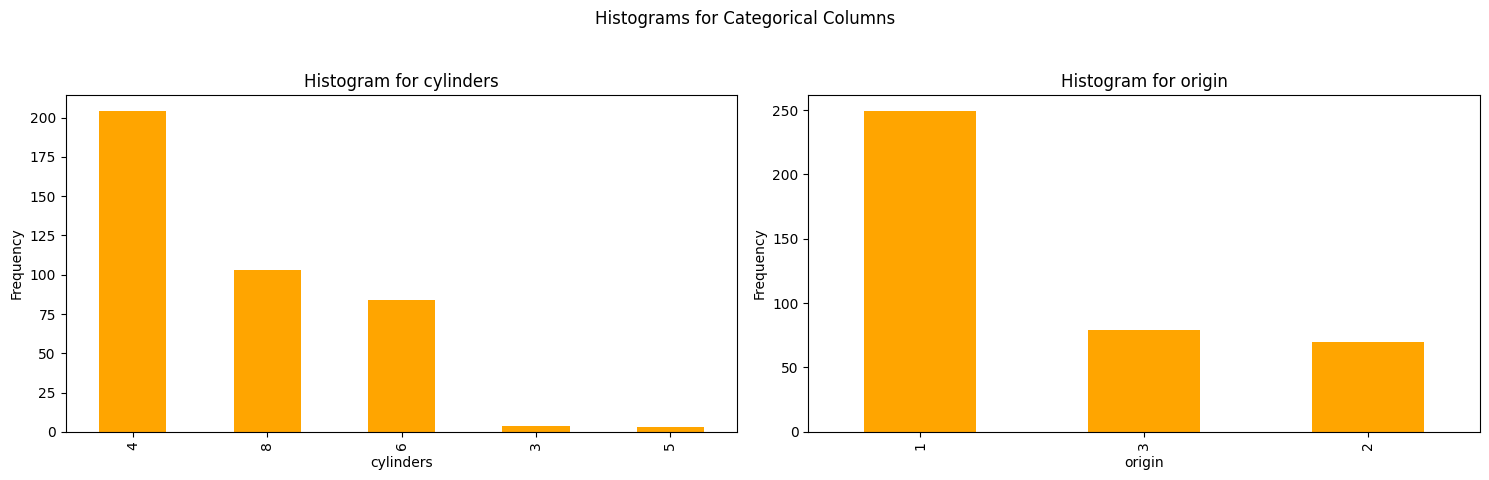

In [15]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histograms for Categorical Columns')

# Plot individual histograms for each categorical column
i=0
for column in df_cat.columns:
    if column == "car name":
      continue #Too many unique values
    df_cat[column].value_counts().plot(kind='bar', color='orange', ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    i+=1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **Data Analysis**: Numerical Columns

In [16]:
df_num = df.loc[:, 'mpg':'acceleration']
df_num.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130,3504,12.0
1,15.0,350.0,165,3693,11.5
2,18.0,318.0,150,3436,11.0
3,16.0,304.0,150,3433,12.0
4,17.0,302.0,140,3449,10.5


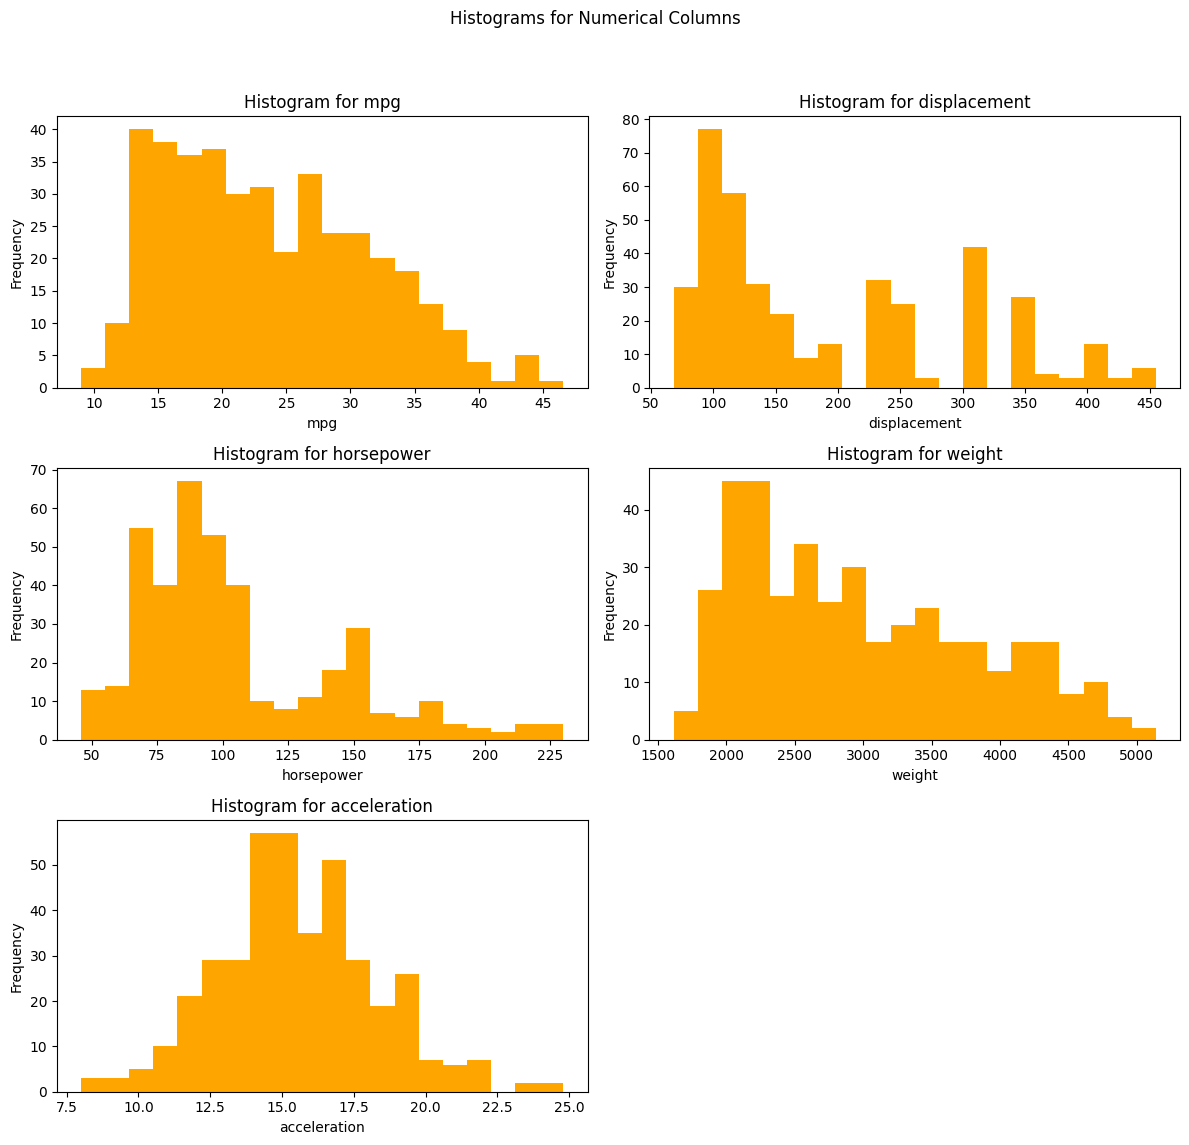

In [17]:
num_cols = len(df_num.columns)
num_rows = int((num_cols + 1) / 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
fig.suptitle('Histograms for Numerical Columns')

axes = axes.flatten()

# Plot individual histograms for each numerical column
for i, column in enumerate(df_num.columns):
    df_num[column].plot(kind='hist', color='orange', ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

fig.delaxes(axes[-1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **g.** Correlation Matrix

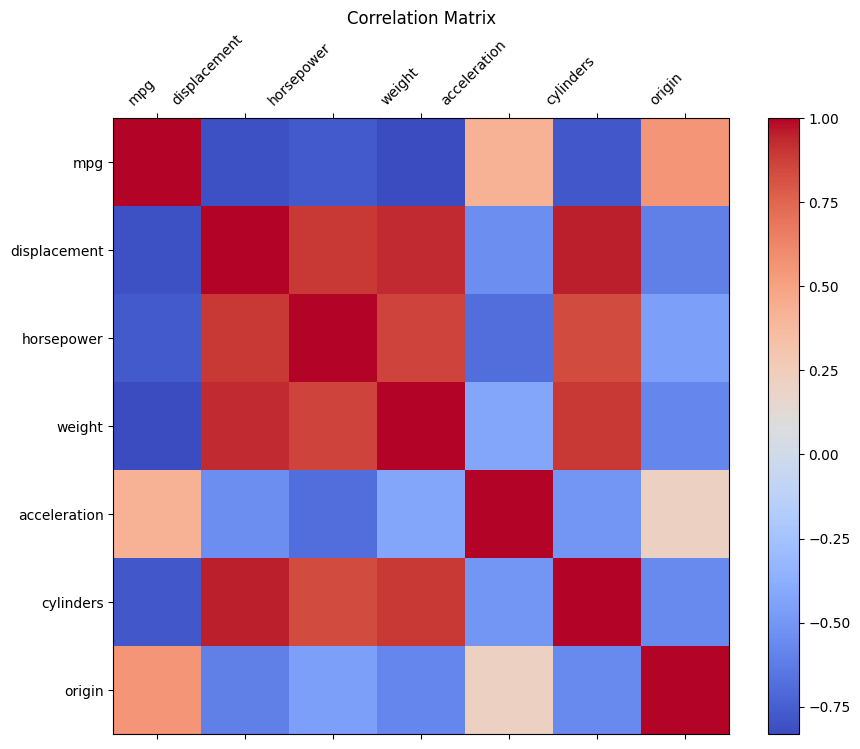

In [18]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a correlation matrix plot using Matplotlib
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add colorbar
fig.colorbar(cax)

# Set the labels and title
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)
plt.title('Correlation Matrix')

# Show the plot
plt.show()

---
#### **3.** Creating training and testing sets

In [19]:
X = df.drop(['mpg', 'car name'], axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set - X:", X_train.shape, " y:", y_train.shape)
print("Testing set - X:", X_test.shape, " y:", y_test.shape)

Training set - X: (278, 6)  y: (278,)
Testing set - X: (120, 6)  y: (120,)


---
#### **4.** Linear Regression

##### **a.** Fitting the model to the training data

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### **b.** Evaluating the performance

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 15.903968966011542
R-squared (R2): 0.722885676723034


##### **c.** Visualizing the predictions

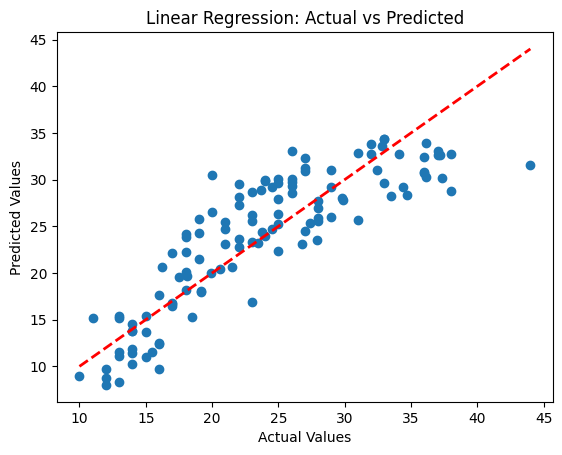

In [22]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

##### **d.** Analyzing the coefficients

In [23]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients)


Coefficients:
        Feature  Coefficient
0  displacement     0.001745
1    horsepower    -0.045366
2        weight    -0.005033
3  acceleration     0.068450
4     cylinders    -0.193776
5        origin     1.656757


---
#### **5.** L1 Norm (Lasso Regression) and L2 Norm (Ridge Regression)

##### **a.** Fitting the model to the training data

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train_scaled, y_train)


ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

##### **b.** Finding the optimal alpha

In [25]:
best_lasso_alpha = lasso_grid.best_params_['alpha']
best_ridge_alpha = ridge_grid.best_params_['alpha']

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train_scaled, y_train)

ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10)

##### **c.** Evaluating the performance

In [26]:
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Lasso Regression - MSE:", mse_lasso)
print("Ridge Regression - MSE:", mse_ridge)

Lasso Regression - MSE: 15.67562304635096
Ridge Regression - MSE: 15.98103212582087


##### **d.** Comparing the coefficients

In [27]:
coefficients_lasso = pd.DataFrame({'Feature': X.columns, 'Coefficient_Lasso': lasso_model.coef_})
coefficients_ridge = pd.DataFrame({'Feature': X.columns, 'Coefficient_Ridge': ridge_model.coef_})

print("\nCoefficients - Lasso:")
print(coefficients_lasso)

print("\nCoefficients - Ridge:")
print(coefficients_ridge)


Coefficients - Lasso:
        Feature  Coefficient_Lasso
0  displacement          -0.000000
1    horsepower          -1.670986
2        weight          -4.039144
3  acceleration           0.079498
4     cylinders          -0.252460
5        origin           1.244518

Coefficients - Ridge:
        Feature  Coefficient_Ridge
0  displacement          -0.546091
1    horsepower          -1.649133
2        weight          -3.370746
3  acceleration           0.070613
4     cylinders          -0.422203
5        origin           1.265617


##### **d.** Understanding the impact of regularization

In [28]:
coefficients_comparison = pd.merge(coefficients_lasso, coefficients_ridge, on='Feature')

print("\nCoefficients Comparison:")
print(coefficients_comparison)


Coefficients Comparison:
        Feature  Coefficient_Lasso  Coefficient_Ridge
0  displacement          -0.000000          -0.546091
1    horsepower          -1.670986          -1.649133
2        weight          -4.039144          -3.370746
3  acceleration           0.079498           0.070613
4     cylinders          -0.252460          -0.422203
5        origin           1.244518           1.265617


**Lasso** tends to perform feature selection by driving some coefficients to zero, leading to a simpler model with fewer features, while **Ridge** tends to shrink all coefficients towards zero, leading to a model that includes all features but with reduced magnitudes.

In other words **Lasso** regression is useful when we want a simpler model with fewer features, while **Ridge** regression is useful when we want to retain all features but reduce their impact. The choice between the two regularization techniques depends on the specific requirements of the problem and the desired trade-off between simplicity and complexity.